<a href="https://colab.research.google.com/github/fdmy2713-dotcom/FDS/blob/main/Unit06_2_LinearRegression_Hubble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Data & and perform basic data visualization

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MSc in Data Science/FDS/Shared/02_Codes/data/hubble.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88


Details of dataset: Data on distances and velocities of 24 galaxies containing Cepheid stars, from the Hubble space telescope key project to measure the Hubble constant.

* y - The galaxy's relative velocity in kilometres per second.
* x - The galaxy's distance in Mega parsecs. 1 megaparsec is 3.09e19 km.

In [ ]:
#import os
#os.chdir('C:\\Users\\taiho\\Documents\\D_Drive\\Teaching Assignments\\PSB_Academy\\Hertfordshire_Course\\2_BSc_Intro_ML_and_NN\\4_Personal_Resources\\2_Codes\\data')

#import pandas as pd
#df = pd.read_csv('hubble.csv')
#df.head()

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88


Text(0.5, 0, "The galaxy's distance in Mega parsecs (1 Megaparsec is 3.09e19 km)")

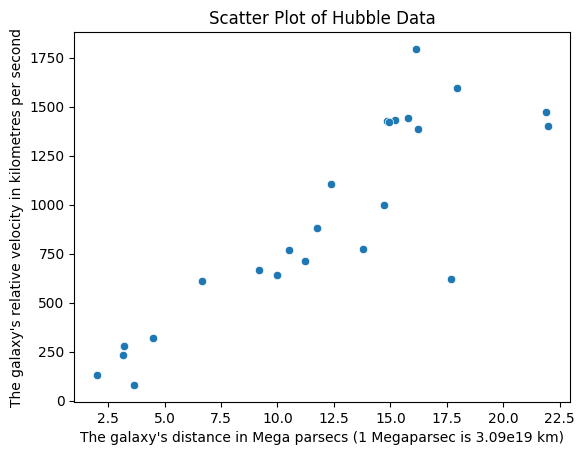

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='x', y='y')
plt.title('Scatter Plot of Hubble Data')
plt.ylabel("The galaxy's relative velocity in kilometres per second")
plt.xlabel("The galaxy's distance in Mega parsecs (1 Megaparsec is 3.09e19 km)")

## 2. Model 1

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## initiate linear regression model
model = LinearRegression(fit_intercept = False)

# define predictor and response variables
X, y = df['x'].values.reshape(-1, 1), df['y']

## fit regression model
model.fit(X,y)

## save the coefficient
model1_coef = model.coef_

## display regression coefficients and R-squared value of the moodel
print(model.intercept_, model.coef_, model.score(X,y))

0.0 [76.58117203] 0.745049808468718


In [6]:
df['y_pred'] = model.predict(df['x'].values.reshape(-1,1))
df.head()

,Galaxy,y,x,y_pred
0,NGC0300,133,2.00,153.162344
1,NGC0925,664,9.16,701.483536
2,NGC1326A,1794,16.14,1236.020117
3,NGC1365,1594,17.95,1374.632038
4,NGC1425,1473,21.88,1675.596044


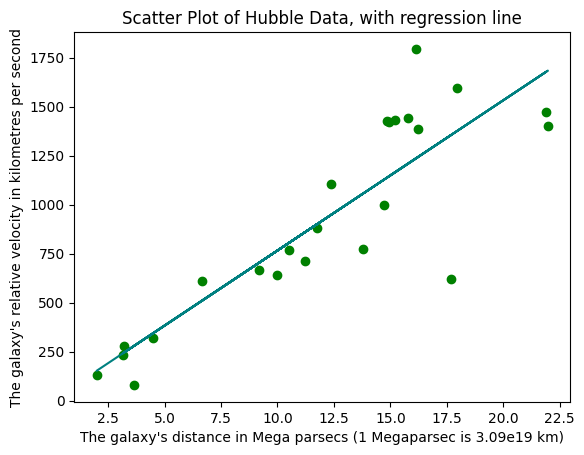

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x=df['x'], y=df['y'], color='g')
plt.title('Scatter Plot of Hubble Data, with regression line')
plt.ylabel("The galaxy's relative velocity in kilometres per second")
plt.xlabel("The galaxy's distance in Mega parsecs (1 Megaparsec is 3.09e19 km)")

plt.plot(df['x'], df['y_pred'], color='teal')
plt.show()

In [8]:
df['residuals'] = df['y'] - df['y_pred']
df.head()

,Galaxy,y,x,y_pred,residuals
0,NGC0300,133,2.00,153.162344,-20.162344
1,NGC0925,664,9.16,701.483536,-37.483536
2,NGC1326A,1794,16.14,1236.020117,557.979883
3,NGC1365,1594,17.95,1374.632038,219.367962
4,NGC1425,1473,21.88,1675.596044,-202.596044


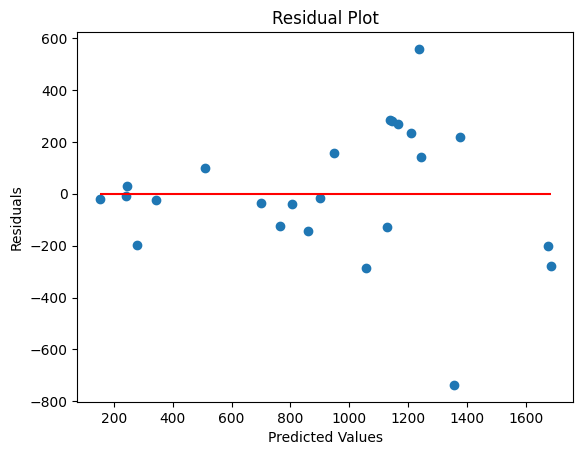

In [9]:
# Plotting the residuals
import matplotlib.pyplot as plt
plt.scatter(df['y_pred'], df['residuals'])
plt.hlines(y = 0, xmin = df['y_pred'].min(), xmax = df['y_pred'].max(), colors = 'red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Note: there appears to be heteroskedasticity, and that is a one of the violations in linear regression assumptions. However, can this be attributed to outliers?

## 3. Model 2 (with outliers removed)

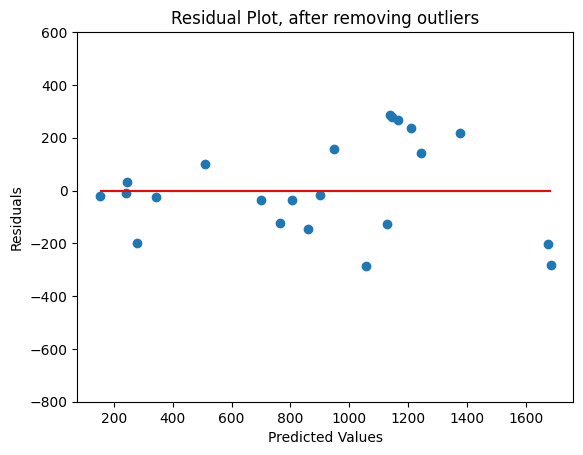

In [10]:
df2 = df[(df['residuals']>=-400) & (df['residuals']<=400)].copy()

# Plotting the residuals
import matplotlib.pyplot as plt
plt.scatter(df2['y_pred'], df2['residuals'])
plt.hlines(y = 0, xmin = df2['y_pred'].min(), xmax = df2['y_pred'].max(), colors = 'red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot, after removing outliers')
plt.ylim([-800, 600])
plt.show()

This model looks better as it is more homoskedastic compared to earlier version

In [11]:
## redo the modelling without the 2 outliers
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## initiate linear regression model
model = LinearRegression(fit_intercept = False)

# define predictor and response variables
X, y = df2['x'].values.reshape(-1, 1), df2['y']

## fit regression model
model.fit(X,y)

## save the coefficient
model2_coef = model.coef_

## display regression coefficients and R-squared value of the moodel
print(model.intercept_, model.coef_, model.score(X,y))

0.0 [77.67291746] 0.8680859519148922


In [12]:
df2 = df2.drop(columns=['y_pred', 'residuals'])
df2.head()

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22


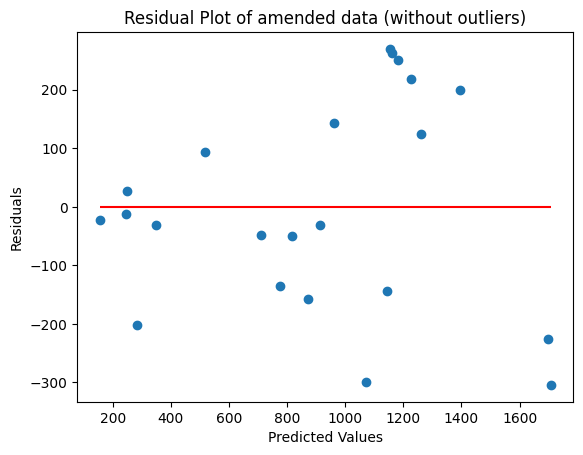

In [13]:
df2['y_pred'] = model.predict(df2['x'].values.reshape(-1,1))
df2['residuals'] = df2['y'] - df2['y_pred']

# Plotting the residuals
import matplotlib.pyplot as plt
plt.scatter(df2['y_pred'], df2['residuals'])
plt.hlines(y = 0, xmin = df2['y_pred'].min(), xmax = df2['y_pred'].max(), colors = 'red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of amended data (without outliers)')
plt.show()

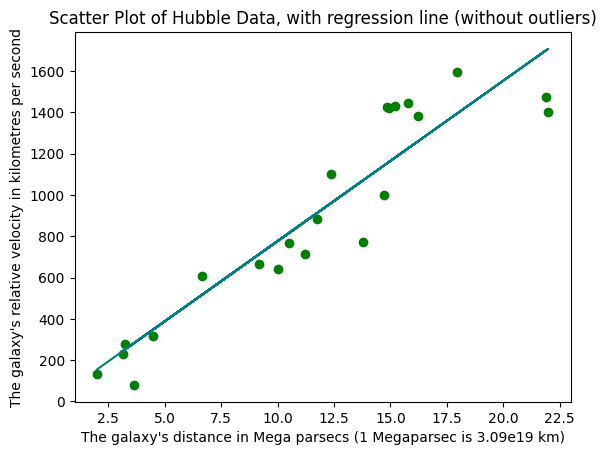

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x=df2['x'], y=df2['y'], color='g')
plt.title('Scatter Plot of Hubble Data, with regression line (without outliers)')
plt.ylabel("The galaxy's relative velocity in kilometres per second")
plt.xlabel("The galaxy's distance in Mega parsecs (1 Megaparsec is 3.09e19 km)")

plt.plot(df2['x'], df2['y_pred'], color='teal')
plt.show()

## 4. Analyzing the model coefficients and follow-on sense-making

Theory: age is reciprocal of hubble constant
      
Hubble constant(H0) = v/d , where:
*   v = radial velocity (unit: km/s)
*   d = distance        (unit: Mega parsec (mpc))
*   H0 where 0 denotes the hubble constant in present time (unit: km/s per mpc).

*   Hubble Constant = H0 (km/s per mpc)
*   Since 1mpc is (3.09 x 10^19km), Hubble Constant  = H0 (km/s) / (3.09 x 10^19km)

That is, Hubble constant is a unit in 1/seconds.
*   Hence, in 1 second it is equivalent to 1/(Hubble Constant). This is equivalent to the age of the universe in seconds!
*   We simply need to divide by (60 second in a min x 60 mins in 1 hr x 24hr in 1 day x 365 day in 1 year) to give the age in years!


In [15]:
## Calculating the hubble constant
hubble_constant1 = model1_coef/3.09e19
hubble_constant2 = model2_coef/3.09e19

## comparing the coefficients of our 2 models
print(f'Hubble Constant (model 1 coefficient): {hubble_constant1}')
print(f'Hubble Constant (model 2 coeeficient): {hubble_constant2}')

Hubble Constant (model 1 coefficient): [2.47835508e-18]
Hubble Constant (model 2 coeeficient): [2.51368665e-18]


In [16]:
age1 = 1/hubble_constant1
age1= age1/(60*60*24*365)

age2 = 1/hubble_constant2
age2 = age2/(60*60*24*365)

## comparing the predictions of age of the universe from our 2 models
print(f'Age of the universe (based on model 1): {age1}')
print(f'Age of the universe (based on model 2): {age2}')

Age of the universe (based on model 1): [1.27946928e+10]
Age of the universe (based on model 2): [1.26148548e+10]


This means that the age of the universe is approximately about 13B years old!